<a href="https://colab.research.google.com/github/adiba82001/CSE366_project/blob/main/mushroom_classification_with_Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving mushrooms.csv to mushrooms (1).csv


In [ ]:
df= pd.read_csv("mushrooms.csv")
df

,classes,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classes               61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


In [ ]:
y = df.classes
y

0        p
1        p
2        p
3        p
4        p
        ..
61064    p
61065    p
61066    p
61067    p
61068    p
Name: classes, Length: 61069, dtype: object

In [ ]:
X = pd.get_dummies(df.drop('classes', axis=1))
y = df['classes'].apply(lambda x: 1 if x == 'p' else 0)
X

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,16.60,17.99,18.19,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,14.07,17.80,17.74,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,14.17,15.77,15.98,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,14.64,16.53,17.20,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.18,3.93,6.22,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
61065,1.27,3.18,5.43,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
61066,1.27,3.86,6.37,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
61067,1.24,3.56,5.44,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(y_test)

11541    0
35700    1
55781    0
29303    1
46601    0
        ..
44375    1
11       1
23571    1
38837    1
44200    1
Name: classes, Length: 18321, dtype: int64


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions=gnb.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
y_predict = predictions

Confusion Matrix:
 [[8028   80]
 [6808 3405]]


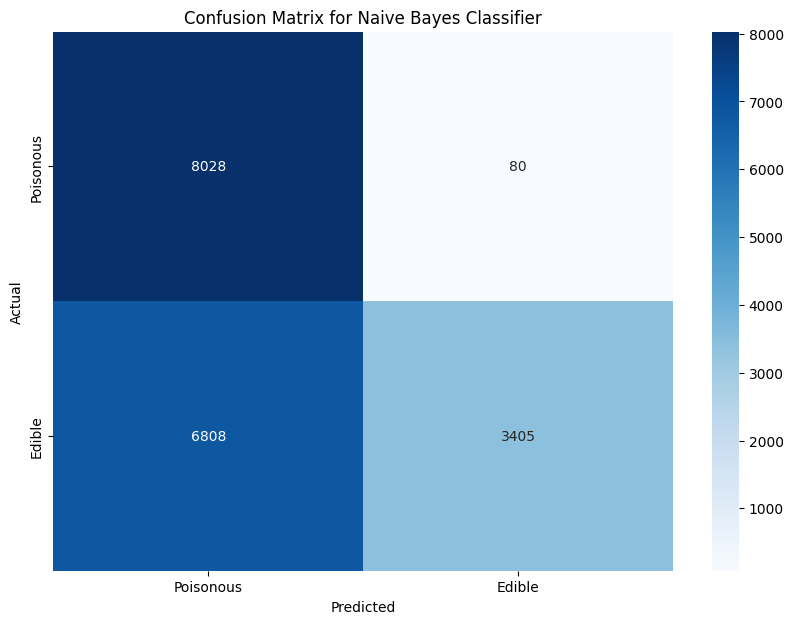

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poisonous', 'Edible'], yticklabels=['Poisonous', 'Edible'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

Percentage of edible mushrooms: 44.51%
Percentage of poisonous mushrooms: 55.49%


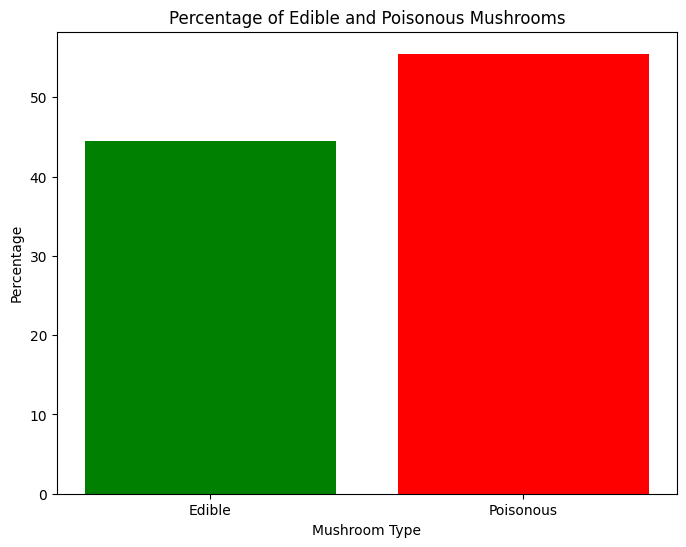

In [ ]:
edible_count = df['classes'].value_counts()['e']
poisonous_count = df['classes'].value_counts()['p']
total_count = len(df)

percentage_edible = (edible_count / total_count) * 100
percentage_poisonous = (poisonous_count / total_count) * 100

print("Percentage of edible mushrooms: {:.2f}%".format(percentage_edible))
print("Percentage of poisonous mushrooms: {:.2f}%".format(percentage_poisonous))


plt.figure(figsize=(8, 6))
plt.bar(['Edible', 'Poisonous'], [percentage_edible, percentage_poisonous], color=['green', 'red'])
plt.xlabel('Mushroom Type')
plt.ylabel('Percentage')
plt.title('Percentage of Edible and Poisonous Mushrooms')
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
a = accuracy_score(y_test, y_predict)
a=a*100
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test, y_predict)

print(f"Accuracy of this model: {a:.2f}%")
print(f'Recall: {recall * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


Accuracy of this model: 62.40%
Recall: 33.34%
Precision: 97.70%
F1 Score: 49.72%


In [ ]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_predict).sum()))

Number of mislabeled points out of a total 18321 points : 6888
